In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from umap import UMAP
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 10]

In [60]:
from os import listdir, walk
from os.path import isfile, join
from pathlib import Path
from functools import reduce

In [65]:
potDoSpektrov = Path(r'D:\magistrska_spektri\normalized_spectra_R20000')

In [37]:
def poisciLastnosti(imeDatoteke):
    lastnosti = []
    lastnosti.append(int(imeDatoteke[1:6]))
    lastnosti.append(float(imeDatoteke[7] + '.' + imeDatoteke[8]))
    lastnosti.append(float(imeDatoteke[10] + '.' + imeDatoteke[11]))
    
    if imeDatoteke[9] == 'M':
        lastnosti[2] = lastnosti[2] * (-1)
        
    return lastnosti

In [78]:
i = 0
#vrstice = 300
#stolpci = 3000
posamezni_dfji = []
Teff = []
logg = []
metal = []
for folder in listdir(potDoSpektrov):
    if 'DAT' in folder:
        continue
    for file in listdir(str(potDoSpektrov) + '\\' + folder):
        if not 'V000K2SNWNVR20N' in file:
            continue
        if i > stolpci:
            break
        else:
            lastnosti = poisciLastnosti(file)
            Teff.append(lastnosti[0])
            logg.append(lastnosti[1])
            metal.append(lastnosti[2])
          # posamezni_dfji.append(pd.read_csv(str(potDoSpektrov) + '\\' + file).head(vrstice))
            posamezni_dfji.append(pd.read_csv(str(potDoSpektrov) + '\\' + folder + '\\' + file))
            i = i + 1  
df_zdruzeniSpektri = pd.concat(posamezni_dfji, axis=1).T

In [155]:
model = UMAP(n_neighbors = 150, min_dist = 0.6, n_components = 2, verbose = True, init='spectral', random_state=42)
umap = model.fit_transform(df_zdruzeniSpektri)

UMAP(min_dist=0.6, n_neighbors=150, random_state=42, verbose=True)
Tue Jan 17 23:03:03 2023 Construct fuzzy simplicial set
Tue Jan 17 23:03:37 2023 Finding Nearest Neighbors
Tue Jan 17 23:03:37 2023 Finished Nearest Neighbor Search
Tue Jan 17 23:03:37 2023 Construct embedding



Tue Jan 17 23:03:43 2023 Finished embedding


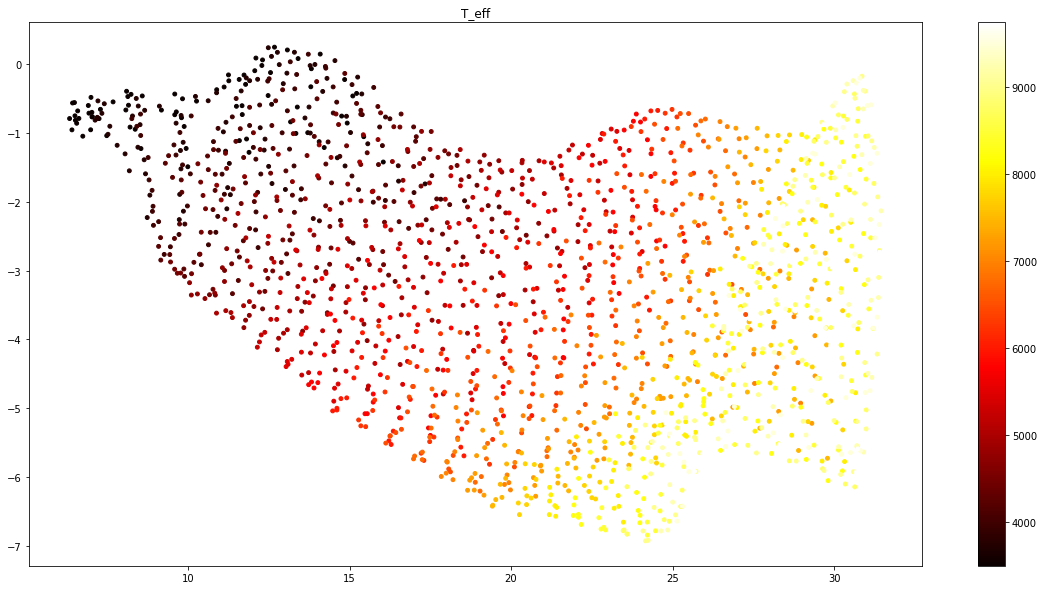

In [156]:
plt.scatter(umap[:, 0], umap[:, 1], c = Teff, cmap = 'hot', s = 15)
plt.title('T_eff')
plt.colorbar()
#plt.savefig('UMAP_T_eff.png')
plt.show()

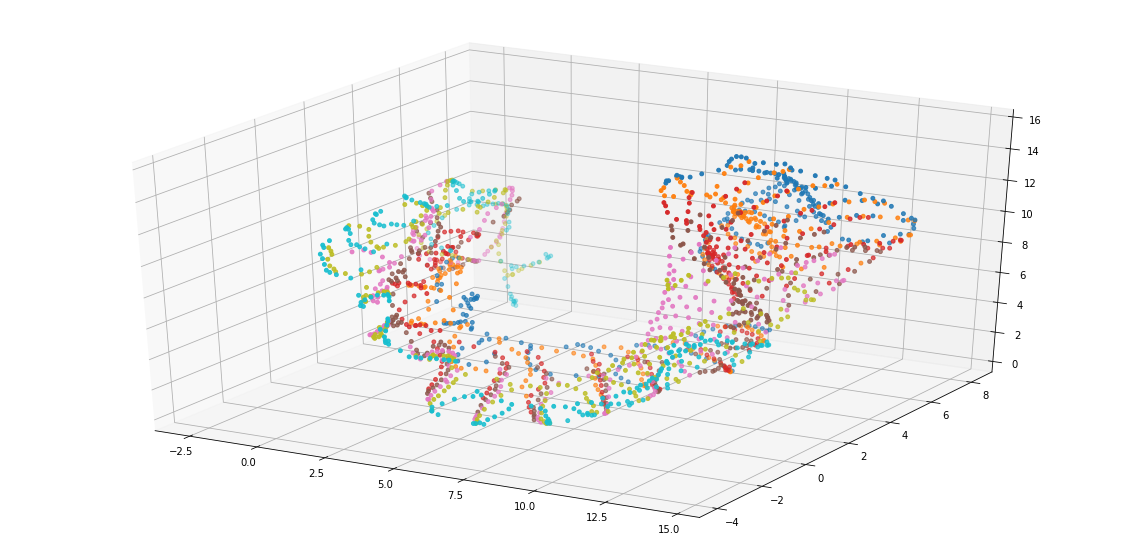

In [113]:

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(umap[:, 0], umap[:, 1], umap[:, 2], c = metal, cmap = 'tab10', s = 15)
#plt.colorbar()
plt.show()